In [1]:
import sys
sys.path.append('/Users/dmitry/Desktop/Thesis/Libs')

In [12]:
import tensorflow as tf

from scenarios import run_AL_SBC
from queries import query_default, query_entropy
from models import create_sequential_model
from reshapes import reshape_mnist
from scores import score_sequential
from encoders import get_mnist_encoder, get_fmnist_encoder

## MNIST

In [6]:
import datasets as ds

In [7]:
x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist = ds.get_mnist()

In [ ]:
from encoders import get_mnist_encoder
mnist_encoder = get_mnist_encoder()

In [17]:
INIT_SIZE = 2000
BATCH_SIZE = 1
TRAIN_SIZE = 10000
QUERIES_NUMBER = 130

In [18]:
mnist_sbc_stat = []
for i in range(5):
    sbc_mnist = run_AL_SBC(query_entropy, create_sequential_model, reshape_mnist, score_sequential, 
                            x_train_mnist, 
                            y_train_mnist, 
                            x_test_mnist, 
                            y_test_mnist,
                            INIT_SIZE, BATCH_SIZE, TRAIN_SIZE, QUERIES_NUMBER, i, mnist_encoder)
    mnist_sbc_stat.append(sbc_mnist)

run sbc
run sbc
run sbc
run sbc
run sbc


In [ ]:
with open('mnist_sbc_stat.pkl', 'wb') as f:
    pickle.dump(mnist_sbc_stat, f)

In [19]:
import pickle

file = open('mnist_init_size_stat.pkl', 'rb')
mnist_entropy_stat = pickle.load(file)['entropy'][2000]

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_init_size_stat.pkl'

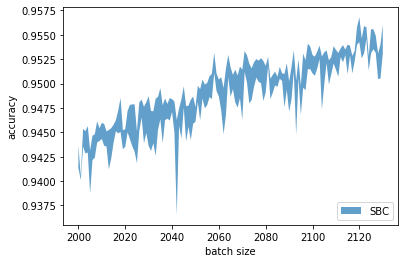

In [22]:
# plot_conf_int(mnist_entropy_stat, "uncertainty only")
import matplotlib.pyplot as plt
from plots import plot_conf_int

plot_conf_int(mnist_sbc_stat, "SBC")
plt.xlabel('batch size')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

## FMNIST

In [ ]:
import datasets as ds
x_train_fmnist, y_train_fmnist, x_test_fmnist, y_test_fmnist = ds.get_fmnist()

In [ ]:
from encoders import get_fmnist_encoder
fmnist_encoder = get_fmnist_encoder()

In [ ]:
fmnist_sbc_stat = []
for i in range(5):
    sbc_fmnist = run_AL_SBC(query_entropy, create_sequential_model, reshape_mnist, score_sequential, 
                            x_train_fmnist, 
                            y_train_fmnist, 
                            x_test_fmnist, 
                            y_test_fmnist,
                            INIT_SIZE, BATCH_SIZE, TRAIN_SIZE, QUERIES_NUMBER, i, fmnist_encoder)
    fmnist_sbc_stat.append(sbc_fmnist)

In [ ]:
with open('fmnist_sbc_stat.pkl', 'wb') as f:
    pickle.dump(fmnist_sbc_stat, f)

In [ ]:
file = open('fmnist_init_size_stat.pkl', 'rb')
fmnist_entropy_stat = pickle.load(file)['entropy'][2000]

In [ ]:
plot_conf_int(fmnist_entropy_stat, "uncertainty only")
plot_conf_int(fmnist_sbc_stat, "SBC")
plt.xlabel('batch size')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()